# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_woFalseLabel_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())
    print("Number of Samples Remaining:", malicious_df.shape[0])

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(40491, 6)

<Axes: ylabel='Type 1'>

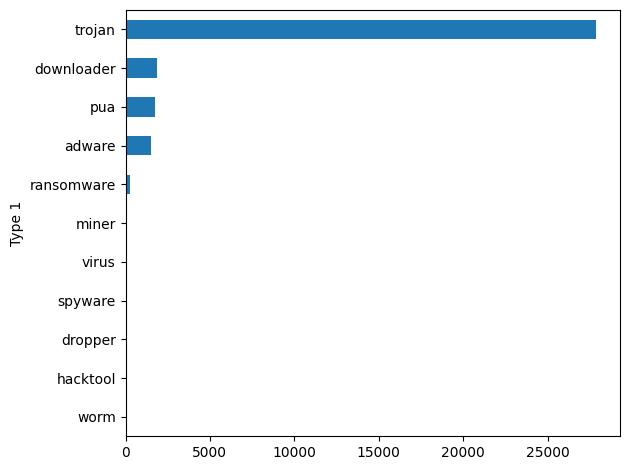

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

print("Raw Clustered malicious samples")
how_many_clusters()

#DROP ROWS THAT ARE FALSELY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

print("After removing falsely labelled malicious samples")
how_many_clusters()

Raw Clustered malicious samples
Number of Clusters: 11668
Number of single-item Clusters: 9677
Number of Samples Remaining: 40491
After removing falsely labelled malicious samples
Number of Clusters: 11668
Number of single-item Clusters: 9677
Number of Samples Remaining: 40491


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        27897
downloader     1885
pua            1773
adware         1515
ransomware      293
miner           108
virus            65
spyware          40
hacktool          4
dropper           4
worm              2
Name: count, dtype: int64

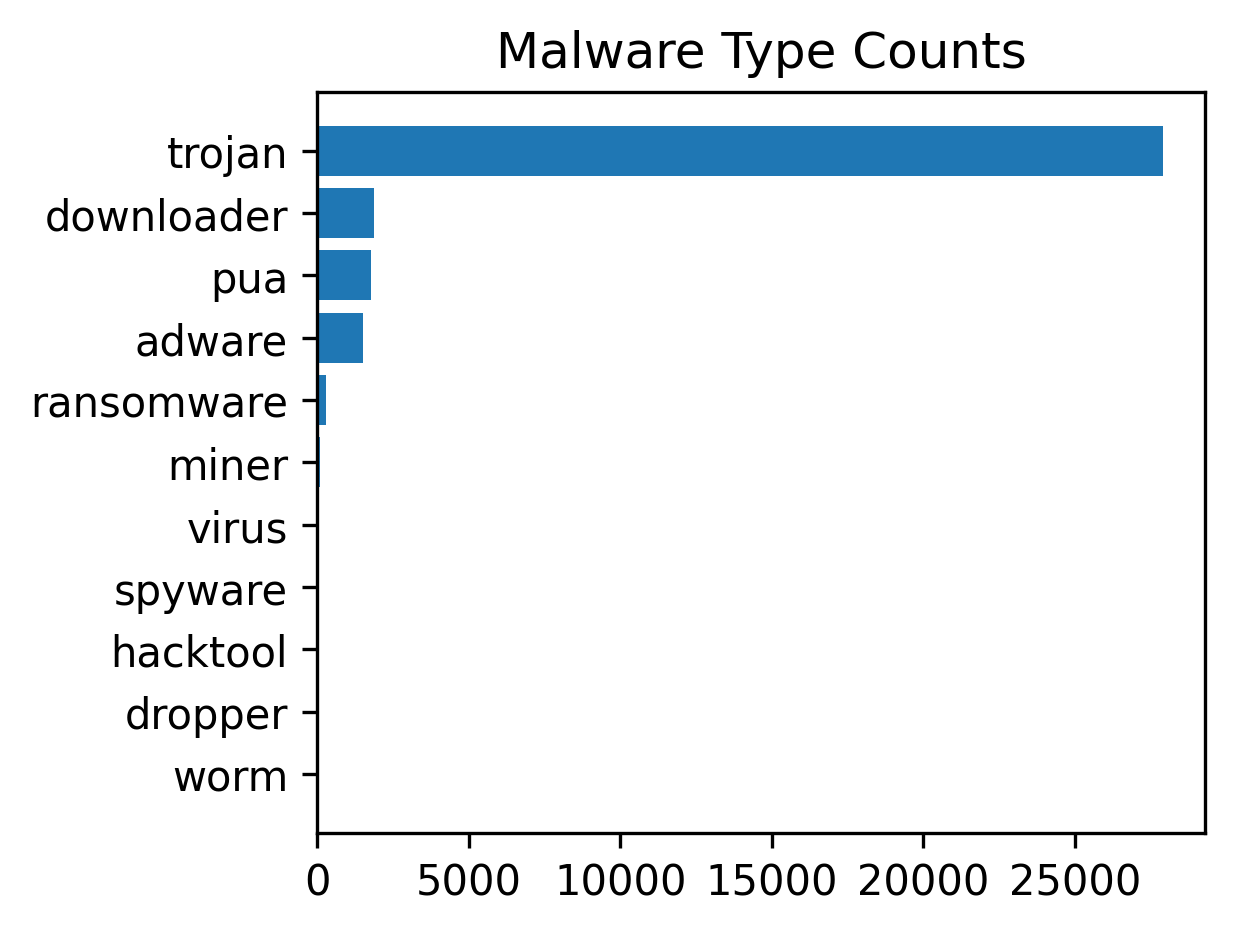

In [4]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [5]:
#Prior to noise removal

print("Prior to noise removal")
how_many_clusters()

Prior to noise removal
Number of Clusters: 11668
Number of single-item Clusters: 9677
Number of Samples Remaining: 40491


In [6]:
# DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

print("After removing yet unlabelled malicious samples\n and clusters with more than 1 malware type")
how_many_clusters()

After removing yet unlabelled malicious samples
 and clusters with more than 1 malware type
Number of Clusters: 9231
Number of single-item Clusters: 8329
Number of Samples Remaining: 10904


In [7]:
# REMOVE SINGLE ITEM CLUSTERS
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if malicious_df[malicious_df['cluster'] == u].shape[0] == 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)

print("After removing single-item clusters")
how_many_clusters()

After removing single-item clusters
Number of Clusters: 902
Number of single-item Clusters: 0
Number of Samples Remaining: 2575


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 2: trojan (8); 
CLUSTER 11: trojan (7); 
CLUSTER 32: trojan (9); 
CLUSTER 44: trojan (2); 
CLUSTER 56: trojan (3); 
CLUSTER 67: trojan (2); 
CLUSTER 69: trojan (3); 
CLUSTER 73: trojan (3); 
CLUSTER 85: trojan (3); 
CLUSTER 86: trojan (4); 
CLUSTER 89: trojan (12); 
CLUSTER 90: trojan (7); 
CLUSTER 93: trojan (13); 
CLUSTER 97: trojan (3); 
CLUSTER 98: trojan (2); 
CLUSTER 104: trojan (3); 
CLUSTER 115: trojan (5); 
CLUSTER 124: trojan (3); 
CLUSTER 140: trojan (6); 
CLUSTER 142: trojan (10); 
CLUSTER 159: trojan (10); 
CLUSTER 162: trojan (2); 
CLUSTER 172: trojan (3); 
CLUSTER 179: trojan (2); 
CLUSTER 188: trojan (2); 
CLUSTER 190: trojan (13); 
CLUSTER 191: trojan (2); 
CLUSTER 194: trojan (4); 
CLUSTER 208: trojan (6); 
CLUSTER 213: trojan (3); 
CLUSTER 216: trojan (17); 
CLUSTER 219: trojan (13); 
CLUSTER 233: trojan (7); 
CLUSTER 237: trojan (3); 
CLUSTER 240: trojan (12); 
CLUSTER 255: trojan (4); 
CLUSTER 259: trojan (2); 
CLUSTER 275: trojan (2); 
CLUSTER 277: trojan 

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount_woNoise.csv", index=False)

# of Unique Malware Type: 3

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 898
Matching Clusters: [2, 11, 44, 56, 67, 69, 73, 85, 86, 89, 90, 93, 98, 104, 115, 124, 140, 142, 159, 162, 172, 179, 188, 190, 191, 194, 208, 213, 216, 219, 233, 237, 240, 255, 259, 275, 277, 281, 289, 294, 310, 316, 318, 323, 325, 326, 331, 334, 335, 344, 347, 361, 363, 367, 97, 373, 376, 383, 389, 400, 406, 419, 422, 430, 443, 452, 453, 456, 459, 463, 467, 469, 471, 473, 492, 493, 499, 501, 508, 512, 516, 540, 548, 554, 557, 565, 571, 586, 593, 595, 596, 597, 603, 604, 609, 613, 624, 626, 636, 645, 655, 664, 667, 676, 681, 686, 689, 693, 705, 712, 715, 719, 720, 722, 730, 733, 745, 760, 762, 763, 764, 767, 773, 774, 777, 779, 780, 781, 788, 792, 802, 804, 810, 811, 812, 813, 814, 817, 820, 822, 826, 829, 833, 838, 845, 855, 859, 866, 867, 871, 872, 873, 875, 881, 889, 901, 902, 912, 923, 947, 32, 970, 975, 976, 984, 987, 991, 997, 1019, 1035, 1041, 1043, 1047, 1049, 1050, 1054, 1065, 

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
2,trojan,898,"[2, 11, 44, 56, 67, 69, 73, 85, 86, 89, 90, 93..."
0,adware,2,"[882, 6895]"
1,downloader,2,"[3119, 3850]"


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}_woNoise.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               40356
LdrLoadDll                           20223
LdrGetDllHandle                      19002
NtClose                              14656
RegOpenKeyExW                        14534
NtAllocateVirtualMemory              13428
RegQueryValueExW                     11141
RegCloseKey                           9471
LoadResource                          8024
FindResourceExW                       7505
NtQueryValueKey                       5486
NtOpenKey                             5298
GetSystemTimeAsFileTime               4826
GetSystemMetrics                      4466
NtFreeVirtualMemory                   3892
NtProtectVirtualMemory                3191
NtDelayExecution                      2750
SetErrorMode                          2718
NtReadFile                            2664
RegOpenKeyExA                         2461
NtCreateFile                          2202
NtDeviceIoControlFile                 2118
SetFilePointer                        2036
SetU

adware
LdrGetProcedureAddress         112
LdrGetDllHandle                 70
LdrLoadDll                      50
OutputDebugStringA              20
NtAllocateVirtualMemory         18
GetSystemTimeAsFileTime         10
GetSystemMetrics                 8
RegOpenKeyExA                    8
RegCloseKey                      8
GetSystemInfo                    8
NtOpenKey                        6
NtClose                          6
SetUnhandledExceptionFilter      6
GetSystemDirectoryW              6
RegOpenKeyExW                    6
NtQueryValueKey                  4
RegQueryValueExA                 4
RegQueryValueExW                 4
GetFileType                      4
NtDuplicateObject                4
DrawTextExW                      4
NtOpenFile                       2
GetUserNameW                     2
NtDeviceIoControlFile            2
GetCursorPos                     2
NtResumeThread                   2
NtCreateThreadEx                 2
CoInitializeEx                   2
CryptDecrypt 

downloader
NtOpenKey                      60
NtClose                        60
NtOpenFile                     54
FindResourceExW                44
LoadResource                   44
LdrGetProcedureAddress         24
LdrGetDllHandle                22
NtAllocateVirtualMemory        18
GetSystemMetrics               14
NtDelayExecution               12
GetCursorPos                   12
LoadStringA                     6
NtFreeVirtualMemory             4
IsDebuggerPresent               4
DrawTextExW                     4
LdrLoadDll                      4
NtQueryValueKey                 4
GetSystemTimeAsFileTime         2
SetUnhandledExceptionFilter     2
NtQueryAttributesFile           2
NtMapViewOfSection              2
RegOpenKeyExA                   2
Name: count, dtype: int64

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['OleInitialize', 'GetNativeSystemInfo', 'LookupPrivilegeValueW', 'NtCreateFile', 'NtCreateSection', 'GetUserNameA', 'RegEnumKeyExA', 'NtOpenKeyEx', 'NtQuerySystemInformation', 'CryptCreateHash', 'CryptHashData', 'GetFileSize', 'SetFilePointer', 'NtReadFile', 'RegEnumKeyW', 'UuidCreate', 'RegCreateKeyExW', 'RegSetValueExW', 'CoCreateInstance', 'FindResourceW', 'SizeofResource', 'RegQueryInfoKeyW', 'RegEnumKeyExW', 'EnumWindows', 'ReadProcessMemory', 'RegCreateKeyExA', 'RegSetValueExA', 'OpenSCManagerA', 'OpenServiceA', 'StartServiceA', 'GetComputerNameW', 'FindFirstFileExW', 'OpenSCManagerW', 'OpenServiceW', 'GlobalMemoryStatusEx', 'LdrUnloadDll', 'NtOpenProcess', 'SetErrorMode', 'FindResourceA', 'SetWindowsHookExA', 'FindResourceExA', 'GetFileAttributesW', 'GetTempPathW', 'NtWriteFile', 'GetTimeZoneInformation', 'NtOpenSection', 'GetVolumeNameForVolumeMountPointW', 'LoadStringW', 'NtUnmapViewOfSection', 'GetFileVersionInfoSizeW', 'GetFileVersionInfoW', '__exception__', 'GetAd

## How many samples remaining?

In [12]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

2575
6.0168%


## What are the remaining clusters?

In [13]:
how_many_clusters()

Number of Clusters: 902
Number of single-item Clusters: 0
Number of Samples Remaining: 2575
